## Finite Differences Method

In Runge-Kutta method, we try to solve boundry value problem. However, as we can see, it's an inefficient process. So, we try to solve BVPs using another aspect. We can discretize the differential equation or use a set of trial functions to approximate the result. Thus we have two powerful methods, FDM(finite differences method) and FEM(finite element method). In this note, we will talk about FDM.

The core idea of FDM is to transform differential form to diffenence form. The simpliest case is transforming $\frac{\partial y_n}{\partial x}$ to $\frac{y_{n+1}-y_n}{h}$ and $\frac{\partial^2 y_n}{\partial x^2}$ to $\frac{y_{n+1}-2y_{n}+y_{n-1}}{h^2}$. In the difference form, the problem we faced is a linear algebra problem.

### Example:

Consider a vibrating string, $\frac{\partial^{2} u(x, t)}{\partial t^{2}}=\frac{T}{\mu_0} \frac{\partial^{2} u(x, t)}{\partial x^{2}}$. Variables seperation for $u(x,t)=f(x)\tau(t)$. Thus we have $\frac{d^{2} \tau}{d t^{2}}+\omega^{2} \tau=0$ and $\frac{d^{2} f(x)}{d x^{2}}+\frac{\omega^{2} \mu_{0}}{T} f(x)=0$. Transform $\frac{d^{2} f(x)}{d x^{2}}+\frac{\omega^{2} \mu_{o}}{T} f(x)=0$ to difference form:
$\frac{T}{\mu_{0}} \frac{f_{i-1}-2 f_{i}+f_{i+1}}{h^{2}}+\omega^{2} f_{i}=0$. Thus we can get the linear algebra problem:

$$\left[\begin{array}{cccc}{-2 \frac{T}{\mu_{0} h^{2}}} & {\frac{T}{\mu_{0} h^{2}}} & {} & {} \\ {\frac{T}{\mu_{0} h^{2}}} & {-2 \frac{T}{\mu_{0} h^{2}}} & {\frac{T}{\mu_{0} h^{2}}} & {} \\ {} & {\ddots} & {\ddots} & {\ddots} & {} \\ {} & {} & {\frac{T}{\mu_{0} h^{2}}} & {-2 \frac{T}{\mu_{0} h^{2}}} & {\frac{T}{\mu_{0} h^{2}}} \\ {} & {} & {} & {\frac{T}{\mu_{0} h^{2}}} & {-2 \frac{T}{\mu_{0} h^{2}}}\end{array}\right]\left[\begin{array}{c}{f_{1}} \\ {f_{2}} \\ {\vdots} \\ {f_{N-1}} \\ {f_{N}}\end{array}\right]=-\omega^{2}\left[\begin{array}{c}{f_{1}} \\ {f_{2}} \\ {\vdots} \\ {f_{N-1}} \\ {f_{N}}\end{array}\right]$$

Now, we can solve its eigen values and eigen vectors.

### Code Example (Julia Lnaguage):

3.13532072535141


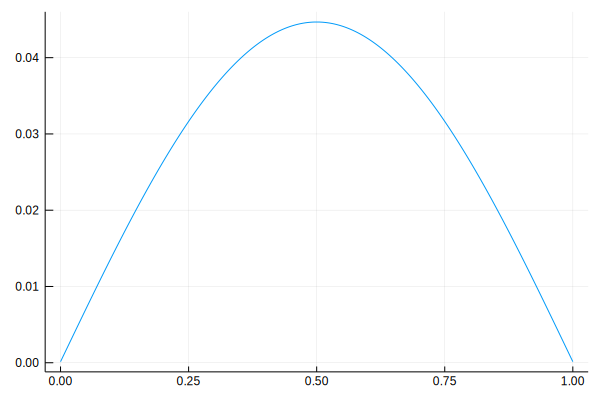

In [12]:
using LinearAlgebra
using Plots
function struct_matrix(T::Float64, μ₀::Float64, h::Float64)
    dv = [-2*T/μ₀/h^2 for i in 0.0:h:1.0]
    ev = [T/μ₀/h^2 for i in 0.0:h:(1.0-h)]
    return SymTridiagonal(dv, ev)
end

coe_matrix = struct_matrix(1.0, 1.0, 0.001)
ei = eigen(coe_matrix)
# print the first eigen state
println(sqrt.(-ei.values[end]))
plot(0.0:0.001:1.0, ei.vectors[:, end], leg=false)

The analytical result is $\omega=\frac{n \pi}{L} \sqrt{\frac{T}{\mu}}$. Thus, our result is pretty accurate.